## Preparing notebook

In [85]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [110]:
# DF access

# Opening Train csv
name_file = 'train.csv'
train = pd.read_csv(name_file, sep=';')
train = train.drop(columns='Unnamed: 0', axis=1)

# Opening Test csv
name_file = 'test.csv'
test = pd.read_csv(name_file, sep=';')
test = test.drop(columns='Unnamed: 0', axis=1)

In [87]:
# Checking DF
train

,area,room,bath,garage,price,properties_comercial,properties_residencial,neighborhood_centro,neighborhood_continental,neighborhood_leste,neighborhood_norte,neighborhood_sul
0,64,2,1,1,5500,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,80,6,6,2,18000,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,86,2,2,1,13500,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,600,1,2,1,1700,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,60,1,1,0,700,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1605,120,1,1,1,1050,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1606,247,1,1,1,1400,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1607,76,1,1,1,1250,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1608,65,5,1,1,23000,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [88]:
test

,area,room,bath,garage,price,properties_comercial,properties_residencial,neighborhood_centro,neighborhood_continental,neighborhood_leste,neighborhood_norte,neighborhood_sul
0,37,8,4,0,2900,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,64,3,4,1,5500,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,44,0,1,1,13000,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,76,2,2,2,18000,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,81,0,1,0,2500,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
532,59,3,1,1,1800,0.0,1.0,1.0,0.0,0.0,0.0,0.0
533,89,2,2,1,12000,0.0,1.0,0.0,0.0,0.0,1.0,0.0
534,360,2,2,1,3000,0.0,1.0,0.0,1.0,0.0,0.0,0.0
535,686,2,2,2,2800,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## Feature engineering 

Target:
* price - continuous

Features:
* area - continuous
* room - ordinal
* bath - ordinal
* garage - ordinal
* properties <residencial, comercial>  - binary
* neighborhood <centro, continental, leste, norte, sul> - binary

### Imbalanced values

In [114]:
# Train

## Defining variables len
res = len(train[train['properties_residencial'] == 1])
com = len(train[train['properties_comercial'] == 1])
dow = len(train[train['neighborhood_centro'] == 1])
con = len(train[train['neighborhood_continental'] == 1])
eas = len(train[train['neighborhood_leste'] == 1])
nor = len(train[train['neighborhood_norte'] == 1])
sou = len(train[train['neighborhood_sul'] == 1])
total = len(train['properties_comercial'])

## Getting the variables proportion over total values
var = ['residencial', 'commercial', 'downtown', 'continent', 'east', 'north', 'south']
num = [res, com, dow, con, eas, nor, sou]
for n in range(7):
    print(f'Train {var[n]} values = {(num[n]/total*100):.2f}%')

Train residencial values = 60.87%
Train commercial values = 39.13%
Train downtown values = 47.20%
Train continent values = 18.20%
Train east values = 2.24%
Train north values = 26.96%
Train south values = 5.40%


In [115]:
# Train

## Defining variables len
res = len(test[test['properties_residencial'] == 1])
com = len(test[test['properties_comercial'] == 1])
dow = len(test[test['neighborhood_centro'] == 1])
con = len(test[test['neighborhood_continental'] == 1])
eas = len(test[test['neighborhood_leste'] == 1])
nor = len(test[test['neighborhood_norte'] == 1])
sou = len(test[test['neighborhood_sul'] == 1])
total = len(test['properties_comercial'])

## Getting the variables proportion over total values
var = ['residencial', 'commercial', 'downtown', 'continent', 'east', 'north', 'south']
num = [res, com, dow, con, eas, nor, sou]
for n in range(7):
    print(f'Test {var[n]} values = {(num[n]/total*100):.2f}%')

Test residencial values = 62.20%
Test commercial values = 37.80%
Test downtown values = 48.79%
Test continent values = 18.62%
Test east values = 2.05%
Test north values = 24.77%
Test south values = 5.77%


### Treating outliers

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/App

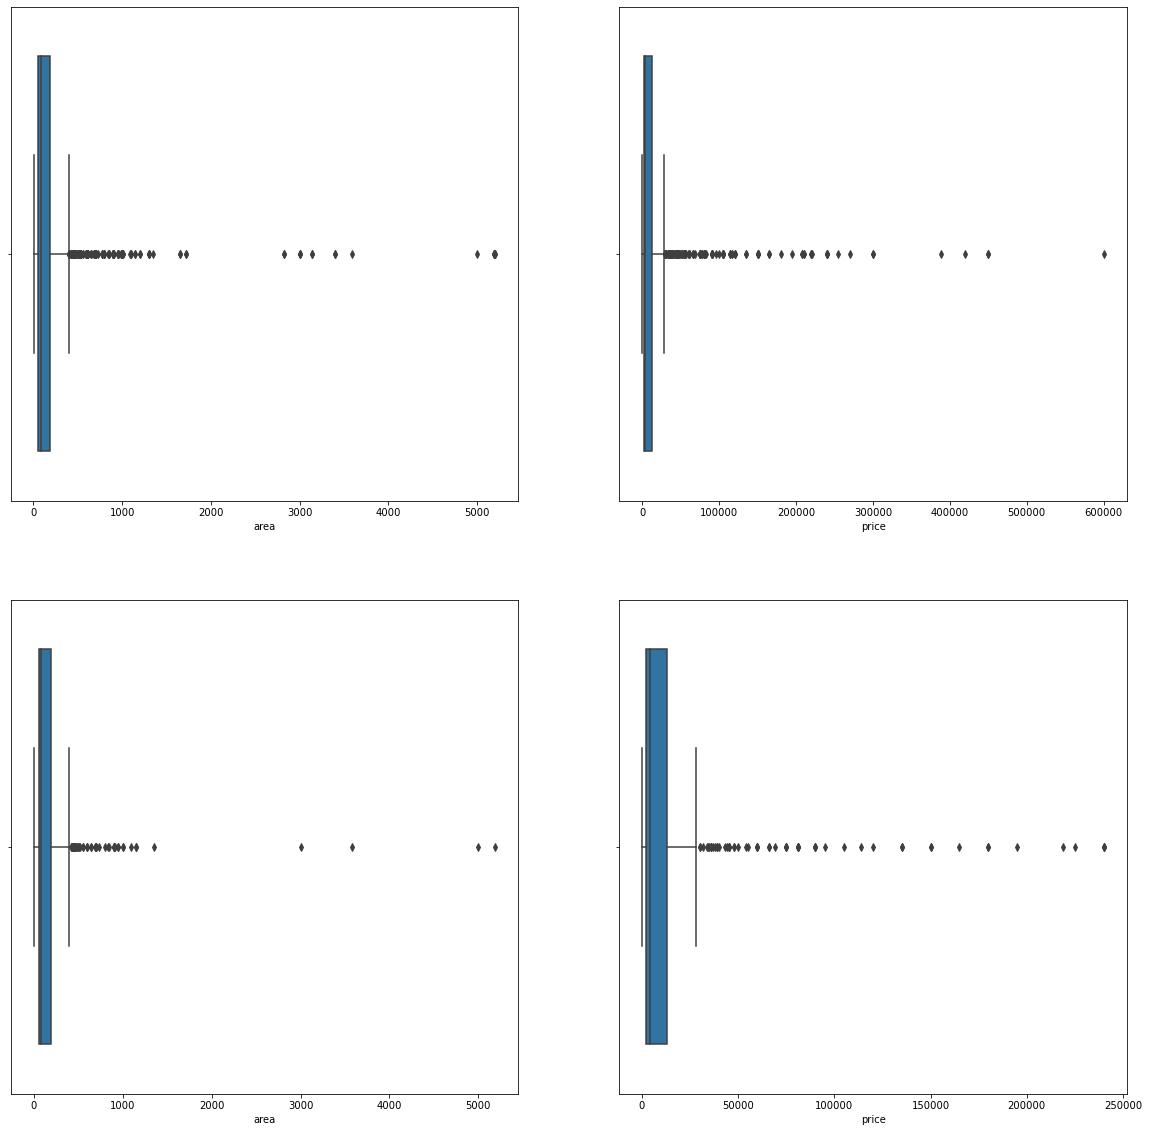

In [104]:
# Outliers >> below 25th whisker or above 75th whisker
n_rows=2
n_cols=2
# Subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(20, 20)

sns.boxplot(train['area'], ax=axes[0, 0])
sns.boxplot(test['area'], ax=axes[1, 0])
sns.boxplot(train['price'], ax=axes[0, 1])
sns.boxplot(test['price'], ax=axes[1, 1])

plt.show()

In [116]:
# Defining  DF treated whith IQR

train_iqr = train.copy(deep=True)
test_iqr = test.copy(deep=True)

In [117]:
print(len(train) == len(train_iqr))
print(len(test) == len(test_iqr))

True
True


In [118]:
# IQR to remove outliers

## Function 
def iqr_remove(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  return df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

In [119]:
# IQR train
print(f'Train: \nInitial sample size = {len(train_iqr)}')
train_iqr = iqr_remove(train_iqr, 'price')
train_iqr = iqr_remove(train_iqr, 'area')
print(f'Final sample size = {len(train_iqr)} | {(len(train_iqr)/len(train)*100):.2f}%')

# IQR test
print(f'\nTest: \nInitial test sample size = {len(test_iqr)}')
test_iqr = iqr_remove(test_iqr, 'price')
test_iqr = iqr_remove(test_iqr, 'area')
print(f'Final test sample size = {len(test_iqr)} | {(len(test_iqr)/len(test)*100):.2f}%')

Train: 
Initial sample size = 1610
Final sample size = 1250 | 77.64%

Test: 
Initial test sample size = 537
Final test sample size = 417 | 77.65%


## Train & Test | w/o treating imbalance or outliers

### Breaking the train & test  into x, y

In [121]:
x_train = train.drop(columns='price')
y_train = train['price']
x_test = test.drop(columns='price')
y_test = test['price']

In [122]:
print(f' Train | x_train = {len(x_train)} | y_train = {len(y_train)}')

 Train | x_train = 1610 | y_train = 1610


In [123]:
print(f' Test | x_test = {len(x_test)} | y_test = {len(y_test)}')

 Test | x_test = 537 | y_test = 537


### Algorithms | test

#### Baseline |  Linear regression test

In [74]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.4995389231461994

In [76]:
from sklearn.dummy import DummyRegressor
reg = DummyRegressor(strategy='mean')
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

-0.0003942644032137732

In [77]:
print( f' Linear Regression    |  MSE  |  RMSE  |  R2  ')
{'train_metric' : np.round([mse_lr_train, rmse_lr_train, r2_score(train[target], y_pred_train)], 3),
'test_metric' : np.round([mse_lr, rmse_lr, r2_score(test[target], y_pred_test)],3)}

 Linear Regression    |  MSE  |  RMSE  |  R2  


{'train_metric': array([0.798, 0.894, 0.548]),
 'test_metric': array([0.876, 0.936, 0.5  ])}

#### Comparison | 

In [95]:
reg_list = [RidgeCV(),
            SVR(),
            KNeighborsRegressor(),
            RandomForestRegressor(),
            AdaBoostRegressor(),
            GradientBoostingRegressor(),
            MLPRegressor()
            ]

In [99]:
for reg in reg_list:
    print(f'Model training {reg.__class__.__name__}')
    reg.fit(x_train, y_train)
    
    train_score = reg.score(x_train, y_train)
    cv_scores = cross_val_score(reg, x_train, y_train)
    test_score = reg.score(x_test, y_test)
    
    print(f"R2 Score Train: {train_score}")
    print(f"R2 Score Valid: {np.mean(cv_scores):.2f} +- {np.std(cv_scores):.2f}")
    print(f"R2 Score Test: {test_score}")
    print('='*80)

Treinando Modelo RidgeCV
R2 Score Train: 0.5481608219980725
R2 Score Valid: 0.54 +- 0.05
R2 Score Test: 0.49998212607720705
Treinando Modelo SVR
R2 Score Train: 0.5690714122648676
R2 Score Valid: 0.55 +- 0.07
R2 Score Test: 0.5062157359417271
Treinando Modelo KNeighborsRegressor
R2 Score Train: 0.6848917479301975
R2 Score Valid: 0.52 +- 0.06
R2 Score Test: 0.484969118803641
Treinando Modelo RandomForestRegressor
R2 Score Train: 0.9129623186810992
R2 Score Valid: 0.50 +- 0.05
R2 Score Test: 0.48861809934896605
Treinando Modelo AdaBoostRegressor
R2 Score Train: 0.45741113609229866
R2 Score Valid: 0.42 +- 0.05
R2 Score Test: 0.4009683159825106
Treinando Modelo GradientBoostingRegressor
R2 Score Train: 0.6812532592299557
R2 Score Valid: 0.60 +- 0.05
R2 Score Test: 0.5777054017164773
Treinando Modelo MLPRegressor


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.

R2 Score Train: 0.5782057189593286
R2 Score Valid: 0.55 +- 0.06
R2 Score Test: 0.5188260468561445


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Algorithms | report

In [ ]:
report = pd.DataFrame(report).sort_values(by='cv_scores_mean', ascending=False)
relatorio.head(10)

## Train_iqr & Test_iqr

### Breaking the train_iqr & test_iqr  into x, y

### Algorithms | test

### Algorithms | report

In [ ]:
## FROM EXPLORATORY ANALYSIS DF

In [ ]:
train_log = train.apply(np.log1p)
train_log

In [ ]:
# Análise de outliers
REMOVER_OUTLIERS = False

quartis = train_log.quantile([0.25,0.5,0.75])

Q1 = quartis.loc[0.25]
Q3 = quartis.loc[0.75]
IQR = Q3-Q1

k = 1.5 
low_limit = Q1-k*IQR
high_limit = Q1+k*IQR

train_wo_outlier = train_log[train_log >= low_limit].dropna()
train_wo_outlier = train_wo_outlier[train_wo_outlier <= high_limit].dropna()

if REMOVER_OUTLIERS:
  train = train.loc[train_wo_outlier.index]

print(f'Initial train sample size: {len(train)}')
print(f'Final train sample size: {len(train_wo_outlier)}')
print(f'Final size is {round(len(train_wo_outlier) / len(train) * 100, 2)}% of the previous one')

In [ ]:
# Análise de outliers
REMOVER_OUTLIERS = False

quartis = test_log.quantile([0.25,0.5,0.75])

Q1 = quartis.loc[0.25]
Q3 = quartis.loc[0.75]
IQR = Q3-Q1

k = 1.5 
low_limit = Q1-k*IQR
high_limit = Q1+k*IQR

test_wo_outlier = test_log[test_log >= low_limit].dropna()
test_wo_outlier = test_wo_outlier[test_wo_outlier <= high_limit].dropna()

if REMOVER_OUTLIERS:
  test = test.loc[test_wo_outlier.index]

print(f'Initial test sample size: {len(test)}')
print(f'Final test sample size: {len(test_wo_outlier)}')
print(f'Final size is {round(len(test_wo_outlier) / len(test) * 100, 2)}% of the previous one')

In [ ]:
# Exportando o df para máquina local
train_log.to_csv('train_log.csv', sep=';')
test_log.to_csv('test_log.csv', sep=';')

In [ ]:
# Removing outliers
REMOVER_OUTLIERS = False

quartis = test_log.quantile([0.25,0.5,0.75])

Q1 = quartis.loc[0.25]
Q3 = quartis.loc[0.75]
IQR = Q3-Q1

k = 1.5 
low_limit = Q1-k*IQR
high_limit = Q1+k*IQR

test_wo_outlier = test_log[test_log >= low_limit].dropna()
test_wo_outlier = test_wo_outlier[test_wo_outlier <= high_limit].dropna()

if REMOVER_OUTLIERS:
  test = test.loc[test_wo_outlier.index]

print(f'Initial test sample size: {len(test)}')
print(f'Final test sample size: {len(test_wo_outlier)}')
print(f'Final size is {round(len(test_wo_outlier) / len(test) * 100, 2)}% of the previous one')

In [42]:
features = ['area', 'room', 'bath', 'garage', 'properties_comercial',
           'properties_residencial', 'neighborhood_centro',
           'neighborhood_continental', 'neighborhood_leste', 'neighborhood_norte',
           'neighborhood_sul']
target = ['price']

In [43]:
model = LinearRegression(fit_intercept=1)
model.fit(train.drop(target, axis=1), train[target])

LinearRegression(fit_intercept=1)

In [44]:
y_pred_train = model.predict(train.drop(target, axis=1))
y_pred_test = model.predict(test.drop(target, axis=1))

In [55]:
# Train

mse_lr_train = mean_squared_error(train[target], y_pred_train)
rmse_lr_train = mse_lr_train ** 0.5

# Test
mse_lr = mean_squared_error(test[target], y_pred_test)
rmse_lr = mse_lr ** 0.5

print( f' Linear Regression    |  MSE  |  RMSE  |  R2  ')
{'train_metric' : np.round([mse_lr_train, rmse_lr_train, r2_score(train[target], y_pred_train)], 3),
'test_metric' : np.round([mse_lr, rmse_lr, r2_score(test[target], y_pred_test)],3)}


 Linear Regression    |  MSE  |  RMSE  |  R2  


{'train_metric': array([0.798, 0.894, 0.548]),
 'test_metric': array([0.876, 0.936, 0.5  ])}

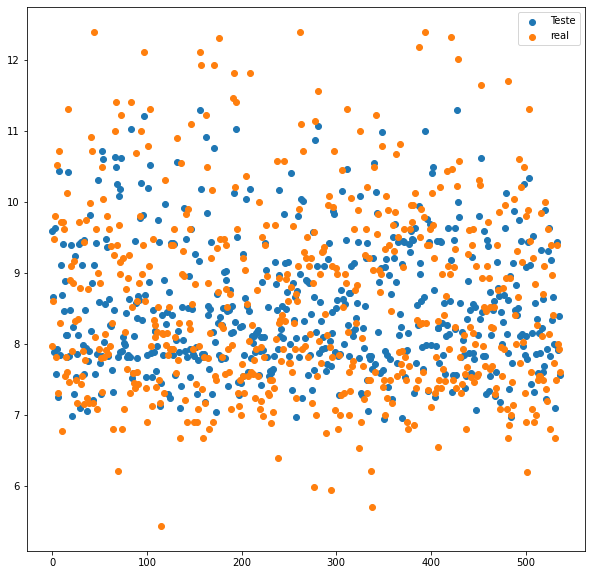

In [90]:
plt.figure(figsize=(10,10))
plt.scatter(test.index, y_pred_test)
plt.scatter(test.index, test[target])
plt.legend(["Teste","real"])
plt.show()

In [91]:
! pip install xgboost

     |████████████████████████████████| 1.3 MB 1.6 MB/s eta 0:00:01


In [93]:
from sklearn.linear_model import RidgeCV, Lasso, ElasticNet, LassoLars, HuberRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

In [97]:
 {test_score}")
    print('='*80)

Treinando Modelo RidgeCV
R2 Score Train: 0.5481608219980725
R2 Score Valid: 0.54 +- 0.05
R2 Score Test: 0.49998212607720705
Treinando Modelo SVR
R2 Score Train: 0.5690714122648676
R2 Score Valid: 0.55 +- 0.07
R2 Score Test: 0.5062157359417271
Treinando Modelo KNeighborsRegressor
R2 Score Train: 0.6848917479301975
R2 Score Valid: 0.52 +- 0.06
R2 Score Test: 0.484969118803641
Treinando Modelo RandomForestRegressor
R2 Score Train: 0.9137154922063003
R2 Score Valid: 0.51 +- 0.05
R2 Score Test: 0.4828974147074735
Treinando Modelo AdaBoostRegressor
R2 Score Train: 0.47211922396079387
R2 Score Valid: 0.40 +- 0.05
R2 Score Test: 0.4042846791063882
Treinando Modelo GradientBoostingRegressor
R2 Score Train: 0.6812532592299557
R2 Score Valid: 0.60 +- 0.05
R2 Score Test: 0.5777331913812919
Treinando Modelo MLPRegressor


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R2 Score Train: 0.5795497860651309
R2 Score Valid: 0.56 +- 0.05
R2 Score Test: 0.5105564520294363


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Decision Tree 